 #### Ever wondered which Pittsburgh neighborhood sleeps the most peacefully at night?                                            In this notebook, we’ll explore real arrest data to uncover where crime is least common and visualize our findings with some flair.

Step 1: Load the Data

Before we dive into the numbers, let’s grab our data and take a peek!
We’ll import the dataset and see what kind of information we’re working with.

In [26]:
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv("criminalactivity.csv")
# Look at the first few rows
df.head()


/scratch/slurm-22234/ipykernel_3310949/2355854265.py:3: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("criminalactivity.csv")


,_id,Report_Number,ReportedDate,ReportedTime,Hour,DayofWeek,ReportedMonth,NIBRS_Coded_Offense,NIBRS_Offense_Code,NIBRS_Offense_Category,NIBRS_Offense_Type,NIBRS_Crime_Against,NIBRS_Offense_Grouping,Violation,XCOORD,YCOORD,Zone,Tract,Neighborhood,Block_Address
0,1,PGHP24000024,2024-01-01,00:31,0,Monday,Jan,13A AGGRAVATED ASSAULT,13A,Assault Offenses,Aggravated Assault,Person,A,18 2718 A1 Strangulation Basic - Applying,-80.0268,40.3964,Zone 6,1919.0,Brookline,"2800 Block of FITZHUGH WAY Pittsburgh, PA"
1,2,PGHP24000024,2024-01-01,00:31,0,Monday,Jan,13C INTIMIDATION,13C,Assault Offenses,Intimidation,Person,A,18 2706 A1 Terroristic Threats-General,-80.0268,40.3964,Zone 6,1919.0,Brookline,"2800 Block of FITZHUGH WAY Pittsburgh, PA"
2,3,PGHP24000024,2024-01-01,00:31,0,Monday,Jan,90Z ALL OTHER OFFENSES,90Z,All other Offenses,All other Offenses,Group B,B,75 3733 A Fleeing or Attempting To Elude Polic...,-80.0268,40.3964,Zone 6,1919.0,Brookline,"2800 Block of FITZHUGH WAY Pittsburgh, PA"
3,4,PGHP24000024,2024-01-01,00:31,0,Monday,Jan,23H ALL OTHER LARCENY,23H,Larceny/Theft Offenses,All Other Larceny,Property,A,18 3921 A Theft by Unlawful Taking-Movable – L...,-80.0268,40.3964,Zone 6,1919.0,Brookline,"2800 Block of FITZHUGH WAY Pittsburgh, PA"
4,5,PGHP24000017,2024-01-01,00:21,0,Monday,Jan,9999 Vehicle Offense (Not NIBRS Reportable),999,Not NIBRS Reportable,Not NIBRS Reportable,Group B,B,LO 6 101 Discharge of Firearms Prohibited,-80.0243,40.4582,Zone 1,2107.0,Manchester,"1200 Block of COLUMBUS AVE Pittsburgh, PA"


Step 2: Clean Up Our Data

Our data’s a little messy
Let’s tidy things up: we’ll drop missing neighborhoods and standardize names so everything looks clean and consistent.

In [27]:
# Check for missing values
df.isnull().sum()

# Drop rows without neighborhood information
df = df.dropna(subset=['Neighborhood'])

# Convert ReportedDate to datetime
df['ReportedDate'] = pd.to_datetime(df['ReportedDate'], errors='coerce')

# Make sure neighborhood names are consistent (strip spaces, capitalize)
df['Neighborhood'] = df['Neighborhood'].str.strip().str.title()

df.head()


,_id,Report_Number,ReportedDate,ReportedTime,Hour,DayofWeek,ReportedMonth,NIBRS_Coded_Offense,NIBRS_Offense_Code,NIBRS_Offense_Category,NIBRS_Offense_Type,NIBRS_Crime_Against,NIBRS_Offense_Grouping,Violation,XCOORD,YCOORD,Zone,Tract,Neighborhood,Block_Address
0,1,PGHP24000024,2024-01-01,00:31,0,Monday,Jan,13A AGGRAVATED ASSAULT,13A,Assault Offenses,Aggravated Assault,Person,A,18 2718 A1 Strangulation Basic - Applying,-80.0268,40.3964,Zone 6,1919.0,Brookline,"2800 Block of FITZHUGH WAY Pittsburgh, PA"
1,2,PGHP24000024,2024-01-01,00:31,0,Monday,Jan,13C INTIMIDATION,13C,Assault Offenses,Intimidation,Person,A,18 2706 A1 Terroristic Threats-General,-80.0268,40.3964,Zone 6,1919.0,Brookline,"2800 Block of FITZHUGH WAY Pittsburgh, PA"
2,3,PGHP24000024,2024-01-01,00:31,0,Monday,Jan,90Z ALL OTHER OFFENSES,90Z,All other Offenses,All other Offenses,Group B,B,75 3733 A Fleeing or Attempting To Elude Polic...,-80.0268,40.3964,Zone 6,1919.0,Brookline,"2800 Block of FITZHUGH WAY Pittsburgh, PA"
3,4,PGHP24000024,2024-01-01,00:31,0,Monday,Jan,23H ALL OTHER LARCENY,23H,Larceny/Theft Offenses,All Other Larceny,Property,A,18 3921 A Theft by Unlawful Taking-Movable – L...,-80.0268,40.3964,Zone 6,1919.0,Brookline,"2800 Block of FITZHUGH WAY Pittsburgh, PA"
4,5,PGHP24000017,2024-01-01,00:21,0,Monday,Jan,9999 Vehicle Offense (Not NIBRS Reportable),999,Not NIBRS Reportable,Not NIBRS Reportable,Group B,B,LO 6 101 Discharge of Firearms Prohibited,-80.0243,40.4582,Zone 1,2107.0,Manchester,"1200 Block of COLUMBUS AVE Pittsburgh, PA"


Step 3: Count the Crimes

We’ll count how many crimes occurred in each neighborhood so we can see which ones are the quietest

In [28]:
# Count arrests per neighborhood
crime_by_neighborhood = df['Neighborhood'].value_counts().reset_index()
crime_by_neighborhood.columns = ['Neighborhood', 'Crime_Count']

# Sort from most to least arrests
crime_by_neighborhood = crime_by_neighborhood.sort_values(by='Crime_Count', ascending=True)

crime_by_neighborhood.head(10)



,Neighborhood,Crime_Count
90,Saint Clair,25
89,Ridgemont,32
88,Chartiers,38
87,New Homestead,51
86,Swisshelm Park,61
85,East Carnegie,75
84,Summer Hill,77
83,Esplen,79
82,Oakwood,84
81,Regent Square,95


Step 4: Find the Safest Neighborhood

Drumroll please...
Let’s find out which Pittsburgh neighborhood had the fewest crimes —
a.k.a. the most peaceful spot in the city!

In [29]:
# The last row will have the fewest arrests
safest = crime_by_neighborhood.iloc[0]

print("The safest neighborhood in Pittsburgh is:",
      safest['Neighborhood'],
      "with only",
      safest['Crime_Count'],
      "Crime recorded.")


The safest neighborhood in Pittsburgh is: Saint Clair with only 25 Crime recorded.


Step 5: Visualize the Safest Spots

Let’s plot the 10 neighborhoods with the fewest crimes and see what Pittsburgh’s safest areas look like on a chart.

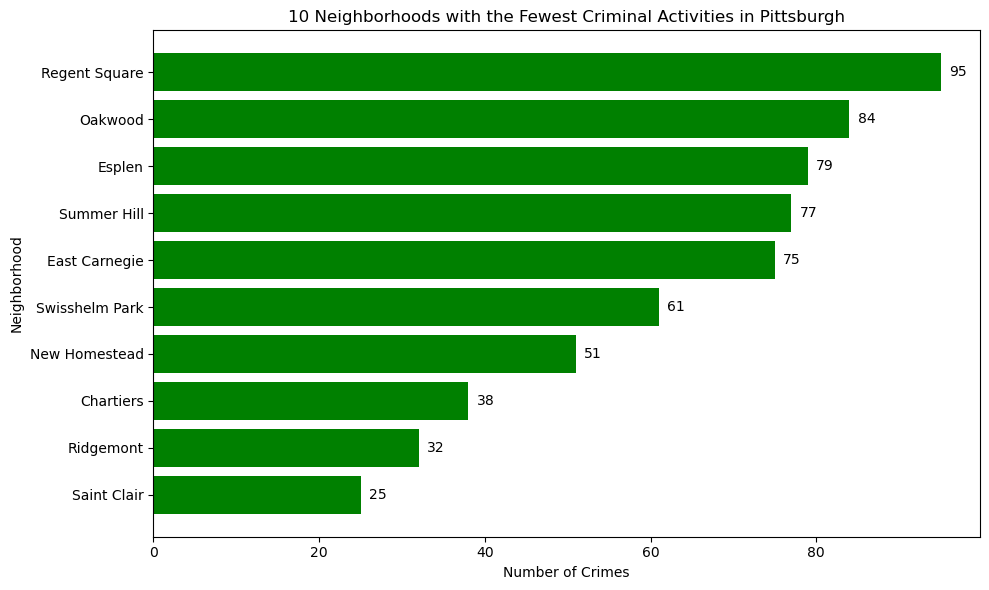

In [30]:
# Get 10 neighborhoods with fewest crimes
bottom_10 = crime_by_neighborhood.head(10)

plt.figure(figsize=(10,6))
plt.barh(bottom_10['Neighborhood'], bottom_10['Crime_Count'], color='green')
plt.title('10 Neighborhoods with the Fewest Criminal Activities in Pittsburgh')
plt.xlabel('Number of Crimes')
plt.ylabel('Neighborhood')

# Optional: add labels on the bars
for index, value in enumerate(bottom_10['Crime_Count']):
    plt.text(value + 1, index, str(value), va='center')

plt.tight_layout()
plt.show()
